# Outliers Filter

In [1]:
#Libraries 
import utils 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.neighbors import LocalOutlierFactor

Load data and detect numerical and categorical columns:

In [2]:
train_raw = utils.load_train()
train_X = utils.one_hot_encode(train_raw.drop(['Transported', 'PassengerId'], 
                                              axis = 1))

num_features = train_raw.select_dtypes(exclude=['object', 'bool']).columns
cat_features = train_X.drop(num_features, axis = 1).columns

In [3]:
train_X.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_1.0', 'VIP_1.0',
       'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E',
       'Cabin_deck_F', 'Cabin_deck_G', 'Cabin_deck_T', 'Cabin_side_S'],
      dtype='object')

## LocalOutlierFactor

In [4]:
from sklearn.neighbors import LocalOutlierFactor

In [5]:
lof = LocalOutlierFactor(n_neighbors=20)
outliers = lof.fit_predict(train_X)
outliers = [i <= -0.5 for i in outliers]

In [6]:
outliers[:10]

[False, False, False, False, False, False, False, False, True, False]

Now we mutate the ```train_raw``` dataset with these labels:

In [7]:
train_noutliers = train_raw.copy()
train_noutliers['outlier'] = outliers
number_outliers = train_noutliers[train_noutliers['outlier'] == True]['outlier'].count()
print('Number of outliers: ', number_outliers)

Number of outliers:  912


Some Plots:

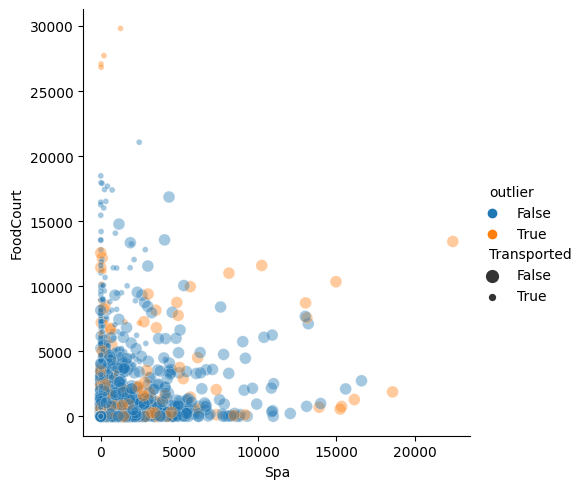

In [8]:
sns.relplot(x = 'Spa', y='FoodCourt', data = train_noutliers, hue = 'outlier', 
            alpha = 0.4, size = 'Transported')

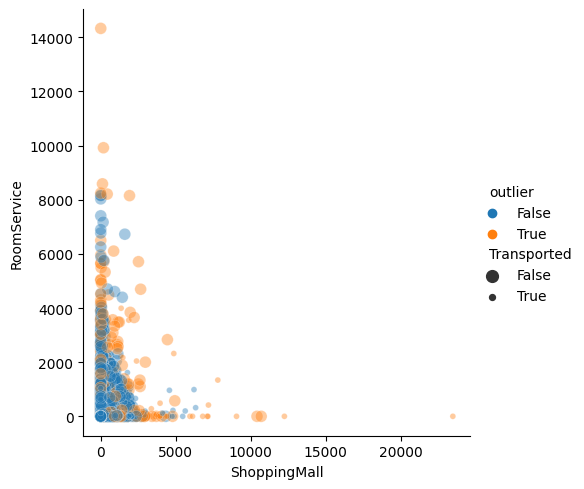

In [9]:
sns.relplot(x = 'ShoppingMall', y='RoomService', data = train_noutliers, hue = 'outlier',
            alpha = 0.4, size = 'Transported')

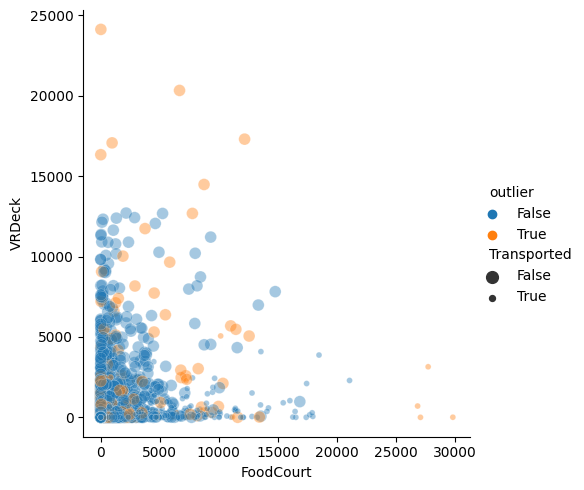

In [10]:
sns.relplot(x = 'FoodCourt', y='VRDeck', data = train_noutliers, hue = 'outlier',
            alpha = 0.4, size = 'Transported')

And we remove those which are outliers:

In [11]:
train_noutliers = train_noutliers[train_noutliers['outlier'] == False].drop('outlier', axis = 1)

We check the number of the database with outliers is the same if we add the number 
of outliers:

In [12]:
print(train_noutliers.shape[0] + number_outliers)
print(train_raw.shape[0])

8693
8693


In [13]:
train_noutliers.to_csv('../data/train_nooutliers.csv', index = False)